In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import math
%matplotlib inline


In [2]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

In [3]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [4]:
# gets all column names and returns index object
cols = confirmed_df.keys()

In [5]:
# returns only the dates columns
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]

# gets date information from columns in an index object
dates = confirmed.keys()

In [6]:
# gets total current tallies and also creates list of daily statistics
world_cases = []
total_deaths = []
mortality_rate = []
total_recovered = []
active_cases = []

for i in dates:
    # the .sum() function adds all values in axis, i.e. daily stats
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    active_cases_tot = confirmed_sum - (death_sum + recovered_sum)
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)
    active_cases.append(active_cases_tot)

In [7]:
# days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)
active_cases = np.array(active_cases).reshape(-1, 1)

In [8]:
world_cases = pd.DataFrame(world_cases, index=dates, columns = ['World Cases'])
total_deaths = pd.DataFrame(total_deaths, index=dates, columns = ['Total Deaths'])
total_recovered = pd.DataFrame(total_recovered, index=dates, columns = ['Total Recoveries'])
mortality_rate = pd.DataFrame(mortality_rate, index=dates, columns = ['Cumulative Mortality Rate'])
active_cases = pd.DataFrame(active_cases, index=dates, columns = ['Active Cases'])

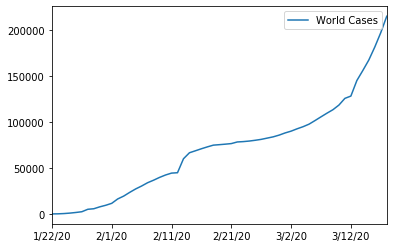

In [9]:
world_cases.plot(kind='line')

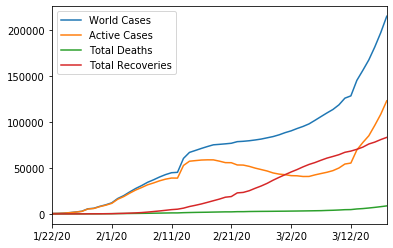

In [10]:
pd.concat([world_cases, active_cases, total_deaths, total_recovered], axis=1).plot()

In [11]:
# new cases per day
new_cases_daily = world_cases
new_cases_daily.rename(columns={'World Cases': 'New Cases'}, inplace=True)
new_cases_daily = new_cases_daily.diff(axis=0)
new_cases_daily.fillna(555, inplace=True)

In [12]:
new_cases_daily['New Cases'] = new_cases_daily['New Cases'].astype(int)

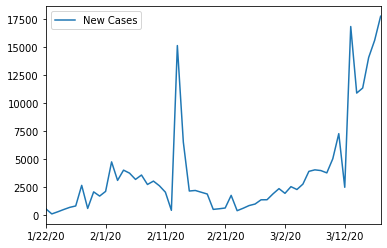

In [13]:
new_cases_daily.plot(kind='line')

In [14]:
new_deaths_daily = total_deaths
new_deaths_daily.rename(columns={'Total Deaths': 'New Deaths'}, inplace=True)
new_deaths_daily = new_deaths_daily.diff(axis=0)
new_deaths_daily.fillna(17, inplace=True)

In [15]:
new_deaths_daily['New Deaths'] = new_deaths_daily['New Deaths'].astype(int)

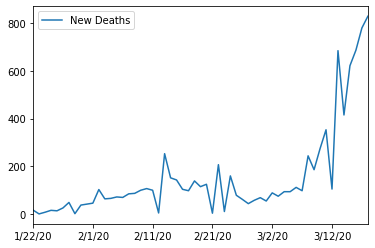

In [16]:
new_deaths_daily.plot(kind='line')

In [17]:
new_recoveries_daily = total_recovered
new_recoveries_daily.rename(columns={'Total Recoveries': 'New Recoveries'}, inplace=True)
new_recoveries_daily = new_recoveries_daily.diff(axis=0)
new_recoveries_daily.fillna(28, inplace=True)

In [18]:
new_recoveries_daily['New Recoveries'] = new_recoveries_daily['New Recoveries'].astype(int)

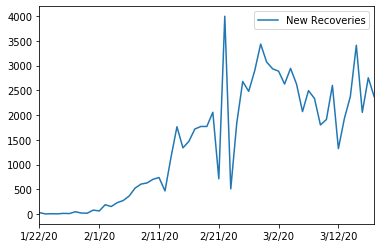

In [19]:
new_recoveries_daily.plot(kind='line')

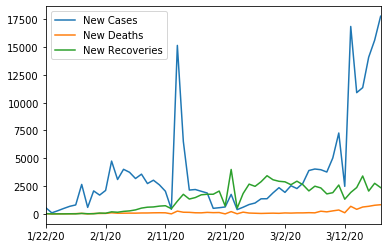

In [20]:
pd.concat([new_cases_daily, new_deaths_daily, new_recoveries_daily], axis=1).plot()

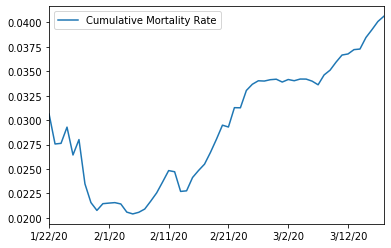

In [21]:
mortality_rate.plot(kind='line')

In [22]:
confirmed_by_country = confirmed_df.drop(['Province/State', 'Lat', 'Long'], axis=1)
deaths_by_country = deaths_df.drop(['Province/State', 'Lat', 'Long'], axis=1)
recoveries_by_country = recoveries_df.drop(['Province/State', 'Lat', 'Long'], axis=1)

In [23]:
# gets list of all countries with cases
countries = confirmed_by_country['Country/Region'].unique()
print(len(countries))

152


In [24]:
confirmed_by_country = confirmed_by_country.groupby(['Country/Region']).sum()
deaths_by_country = deaths_by_country.groupby(['Country/Region']).sum()
recoveries_by_country = recoveries_by_country.groupby(['Country/Region']).sum()

In [25]:
confirmed_by_country

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,8,29,50
Uzbekistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6,10,15
Venezuela,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,17,33,36


In [26]:
confirmed_by_country = confirmed_by_country.swapaxes('index', 'columns')
deaths_by_country = deaths_by_country.swapaxes('index', 'columns')
recoveries_by_country = recoveries_by_country.swapaxes('index', 'columns')

In [27]:
# renames the index
confirmed_by_country.index.names = ['Dates']

In [28]:
confirmed_by_country.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Brazil,Brunei,Bulgaria,Burkina Faso,Cambodia,Cameroon,Canada,Central African Republic,Chile,China,Colombia,Congo (Brazzaville),Congo (Kinshasa),Costa Rica,Cote d'Ivoire,Croatia,Cruise Ship,Cuba,Cyprus,Czechia,Denmark,Djibouti,Dominican Republic,Ecuador,Egypt,Equatorial Guinea,Estonia,Eswatini,Ethiopia,Finland,France,...,Nigeria,North Macedonia,Norway,Oman,Pakistan,Panama,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Romania,Russia,Rwanda,Saint Lucia,Saint Vincent and the Grenadines,San Marino,Saudi Arabia,Senegal,Serbia,Seychelles,Singapore,Slovakia,Slovenia,Somalia,South Africa,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Taiwan*,Tanzania,Thailand,The Bahamas,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia
Dates,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,3,0,0,0,0,0,1,0,0,0,0,0,0,2,0
1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,3,0,5,0,0,0,0,0,2,0,0,0,0,0,0,2,0
1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,3,0,7,0,0,0,0,0,2,0,0,0,0,0,0,2,0
1/26/20,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2075,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,4,0,8,0,0,0,0,0,5,0,0,0,0,0,0,2,0


In [29]:
countries

array(['Thailand', 'Japan', 'Singapore', 'Nepal', 'Malaysia', 'Canada',
       'Australia', 'Cambodia', 'Sri Lanka', 'Germany', 'Finland',
       'United Arab Emirates', 'Philippines', 'India', 'Italy', 'Sweden',
       'Spain', 'Belgium', 'Egypt', 'Lebanon', 'Iraq', 'Oman',
       'Afghanistan', 'Bahrain', 'Kuwait', 'Algeria', 'Croatia',
       'Switzerland', 'Austria', 'Israel', 'Pakistan', 'Brazil',
       'Georgia', 'Greece', 'North Macedonia', 'Norway', 'Romania',
       'Estonia', 'San Marino', 'Belarus', 'Iceland', 'Lithuania',
       'Mexico', 'New Zealand', 'Nigeria', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Armenia',
       'Dominican Republic', 'Indonesia', 'Portugal', 'Andorra', 'Latvia',
       'Morocco', 'Saudi Arabia', 'Senegal', 'Argentina', 'Chile',
       'Jordan', 'Ukraine', 'Hungary', 'Liechtenstein', 'Poland',
       'Tunisia', 'Bosnia and Herzegovina', 'Slovenia', 'South Africa',
       'Bhutan', 'Cameroon', 'Colombia', 'Costa R

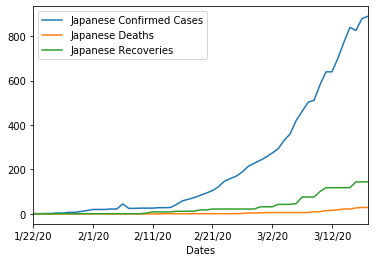

In [30]:
japan_cum = pd.concat([confirmed_by_country['Japan'], deaths_by_country['Japan'], recoveries_by_country['Japan']], axis=1)
japan_cum.columns = ['Japanese Confirmed Cases', 'Japanese Deaths', 'Japanese Recoveries']
japan_cum.plot()

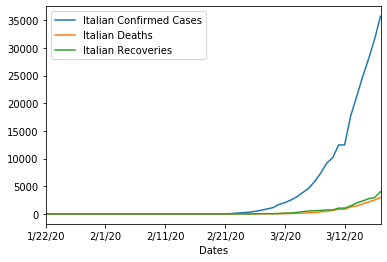

In [31]:
italy_cum = pd.concat([confirmed_by_country['Italy'], deaths_by_country['Italy'], recoveries_by_country['Italy']], axis=1)
italy_cum.columns = ['Italian Confirmed Cases', 'Italian Deaths', 'Italian Recoveries']
italy_cum.plot()

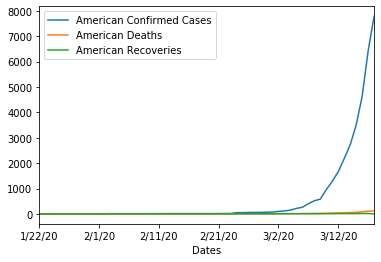

In [32]:
usa_cum = pd.concat([confirmed_by_country['US'], deaths_by_country['US'], recoveries_by_country['US']], axis=1)
usa_cum.columns = ['American Confirmed Cases', 'American Deaths', 'American Recoveries']
usa_cum.plot()

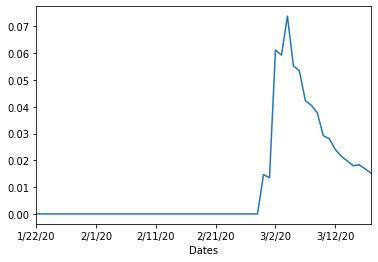

In [45]:
usa_cum['American Morality Rate'] = usa_cum['American Deaths'] / usa_cum['American Confirmed Cases']
usa_cum['American Morality Rate'].plot()

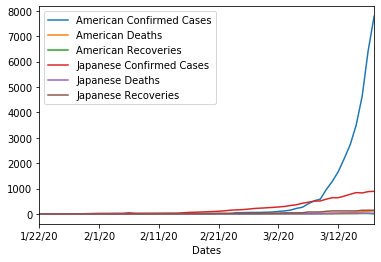

In [33]:
pd.concat([usa_cum, japan_cum], axis=1).plot()

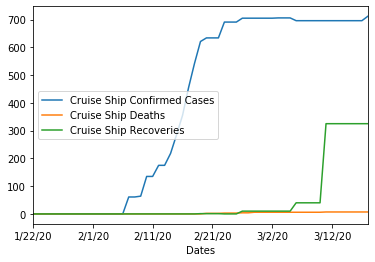

In [41]:
cruise_cum = pd.concat([confirmed_by_country['Cruise Ship'], deaths_by_country['Cruise Ship'], recoveries_by_country['Cruise Ship']], axis=1)
cruise_cum.columns = ['Cruise Ship Confirmed Cases', 'Cruise Ship Deaths', 'Cruise Ship Recoveries']
cruise_cum.plot()

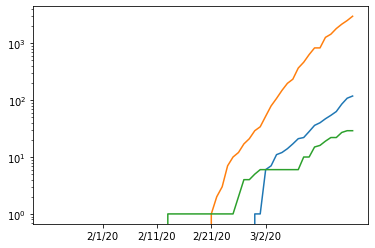

In [35]:
compare = pd.concat([deaths_by_country['US'], deaths_by_country['Italy'], deaths_by_country['Japan']], axis=1)

plt.plot(compare)
plt.yscale('log')
plt.xticks(np.arange(10,50, step=10))
plt.show()

In [36]:
#dropped China b/c otherwise that country dominates everything
# confirmed_by_country.drop(['China'], axis=1).plot.bar(stacked=True)

In [37]:
# deaths_by_country.plot.bar(stacked=True)

In [38]:
# recoveries_by_country.plot.bar(stacked=True)

In [39]:
# world_cases = {days_since_1_22[i]: world_cases[i] for i in range(len(days_since_1_22))}

In [40]:
#wc_df = pd.DataFrame(world_cases, columns=['Days', 'World Cases'])
#wc_df